<h2 align="center",><strong>TALLER 2</strong> </h2>

- Objetivo: evaluar las capacidades del estudiante para aplicar técnicas de machine learning, las 
cuales permita descubrir insights, sugerir accionables al negocio y calcular el valor ganado.  

### **Integrantes**:

1.  Carlos Garcia
2.  Mateo Parra - 202213933

### **Introduccion**:

- En este notebook se va llevar a cabo el taller numero 2 del curso ciencia de datos aplicada. A lo largo del notebook se abarcarn las     diferentes etapas requeridas en el enunciado, desde el entendimiento de los datos hasta las conclusiones y los insights.

### **Librerias**:

In [2]:
%pip install scikit-learn

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


### **Carga De Datos**:

In [3]:
df = pd.read_csv('../data/apartamentos.csv')

### **Entendientno Inicial**:

In [14]:
print(df.shape)
df.head(3)

(43013, 46)


,_id,codigo,tipo_propiedad,tipo_operacion,precio_venta,area,habitaciones,banos,administracion,parqueaderos,...,vigilancia,coords_modified,localidad,barrio,estacion_tm_cercana,distancia_estacion_tm_m,is_cerca_estacion_tm,parque_cercano,distancia_parque_m,is_cerca_parque
0,66d86c7eceda690e85508760,4133491,APARTAMENTO,VENTA,339000000.0,76.0,3.0,2.0,300000.0,1.0,...,0.0,False,SUBA,URB. PICADELLY,Toberin - Foundever,1142.45,0,PARQUE VECINAL DESARROLLO CANTALEJO URBANIZACI...,426.09,1
1,66d86c7eceda690e85508761,3889852,APARTAMENTO,VENTA,223000000.0,63.0,3.0,2.0,NaN,0.0,...,0.0,False,USAQUEN,BARRANCAS PERLAS DEL NORTE,Mazurén,2384.89,0,PARQUE ZONAL ALTA BLANCA,472.47,1
2,66d86c7eceda690e85508762,4386770,APARTAMENTO,VENTA,440898168.0,54.0,3.0,2.0,305000.0,0.0,...,0.0,False,LOS MARTIRES,SAN VICTORINO,De La Sabana,232.22,1,PARQUE METROPOLITANO TERCER MILENIO,961.29,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43013 entries, 0 to 43012
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _id                      43013 non-null  object 
 1   codigo                   43013 non-null  object 
 2   tipo_propiedad           43013 non-null  object 
 3   tipo_operacion           43013 non-null  object 
 4   precio_venta             27584 non-null  float64
 5   area                     43013 non-null  float64
 6   habitaciones             43012 non-null  float64
 7   banos                    43012 non-null  float64
 8   administracion           35088 non-null  float64
 9   parqueaderos             43012 non-null  float64
 10  sector                   41372 non-null  object 
 11  estrato                  43012 non-null  float64
 12  antiguedad               43003 non-null  object 
 13  latitud                  43013 non-null  float64
 14  longitud              

In [20]:
print(len(df.select_dtypes(include=['number']).columns))
df.select_dtypes(include=['number'])

26


,precio_venta,area,habitaciones,banos,administracion,parqueaderos,estrato,latitud,longitud,precio_arriendo,...,ascensor,conjunto_cerrado,piscina,salon_comunal,terraza,vigilancia,distancia_estacion_tm_m,is_cerca_estacion_tm,distancia_parque_m,is_cerca_parque
0,3.390000e+08,76.00,3.0,2.0,300000.0,1.0,3.0,4.746592,-74.057571,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,1142.45,0,426.09,1
1,2.230000e+08,63.00,3.0,2.0,NaN,0.0,3.0,4.730111,-74.028170,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,2384.89,0,472.47,1
2,4.408982e+08,54.00,3.0,2.0,305000.0,0.0,3.0,4.607378,-74.082648,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,232.22,1,961.29,0
3,1.580000e+08,43.00,2.0,2.0,106600.0,0.0,2.0,4.740109,-74.113675,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,2275.08,0,539.98,0
4,2.228000e+08,48.00,3.0,2.0,151000.0,0.0,3.0,4.763900,-74.025280,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,2099.16,0,1661.14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43008,1.900000e+08,49.00,3.0,2.0,204624.0,0.0,2.0,4.754530,-74.080902,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,1712.71,0,198.03,1
43009,3.220000e+08,66.00,3.0,2.0,277400.0,1.0,4.0,4.742568,-74.092140,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,120.16,1,631.25,0
43010,3.300000e+08,90.00,3.0,2.0,112000.0,0.0,4.0,4.630547,-74.079590,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,33.21,1,1211.62,0
43011,1.280000e+09,157.00,3.0,3.0,1050000.0,3.0,6.0,4.702636,-74.027180,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,3005.88,0,1269.56,0


In [19]:
print(len(df.select_dtypes(include=['object']).columns))
df.select_dtypes(include=['object'])

19


,_id,codigo,tipo_propiedad,tipo_operacion,sector,antiguedad,direccion,descripcion,website,last_view,datetime,url,timeline,estado,compañia,localidad,barrio,estacion_tm_cercana,parque_cercano
0,66d86c7eceda690e85508760,4133491,APARTAMENTO,VENTA,BRITALIA,ENTRE 10 Y 20 ANOS,CARRERA 55A # 163-35,"apartamento en venta de 76m2, con vista exteri...",habi.co,2024-08-13 10:34:47.315,2024-07-03 23:27:30.843,https://habi.co/page-data/venta-apartamentos/1...,[{'fecha': {'$date': '2024-07-03T23:27:30.843Z...,NaN,NaN,SUBA,URB. PICADELLY,Toberin - Foundever,PARQUE VECINAL DESARROLLO CANTALEJO URBANIZACI...
1,66d86c7eceda690e85508761,3889852,APARTAMENTO,VENTA,SAN CRISTOBAL NORTE,MAS DE 20 ANOS,CARRERA 7F # 153 - 75,"apartamento en venta de 60m2, con vista interi...",habi.co,2024-09-03 23:46:46.547,2024-07-03 23:27:31.667,https://habi.co/page-data/venta-apartamentos/1...,[],NaN,NaN,USAQUEN,BARRANCAS PERLAS DEL NORTE,Mazurén,PARQUE ZONAL ALTA BLANCA
2,66d86c7eceda690e85508762,4386770,APARTAMENTO,VENTA,LA SABANA,ENTRE 0 Y 5 ANOS,CARRERA 69C #2 - 60,"apartamento en venta de 54m2, con vista exteri...",habi.co,2024-07-10 18:19:39.749,2024-07-03 23:27:31.886,https://habi.co/page-data/venta-apartamentos/1...,[],NaN,NaN,LOS MARTIRES,SAN VICTORINO,De La Sabana,PARQUE METROPOLITANO TERCER MILENIO
3,66d86c7eceda690e85508763,4210060,APARTAMENTO,VENTA,TIBABUYES,ENTRE 10 Y 20 ANOS,CALLE 131C # 126-95,"apartamento en venta de 43 m2, con vista inter...",habi.co,2024-07-10 18:19:03.061,2024-07-03 23:27:32.141,https://habi.co/page-data/venta-apartamentos/1...,[],NaN,NaN,SUBA,LA ESTRELLA II,Portal Suba,PARQUE ZONAL LA GAITANA
4,66d86c7eceda690e85508764,4063762,APARTAMENTO,VENTA,VERBENAL,MAS DE 20 ANOS,CARRERA 5 # 187-15,"apartamento duplex en venta de 48m2, con vista...",habi.co,2024-09-03 23:46:46.592,2024-07-03 23:27:32.361,https://habi.co/page-data/venta-apartamentos/1...,[],NaN,NaN,USAQUEN,HORIZONTES USAQUEN,Terminal,PARQUE VECINAL DESARROLLO VERBENAL I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43008,66d86ebfceda690e85512f60,4323513,APARTAMENTO,VENTA,SUBA,ENTRE 10 Y 20 ANOS,CALLE 157A # 92 - 06,"apartamento en venta de 49m2, con vista interi...",habi.co,2024-09-03 23:46:41.728,2024-09-03 23:46:41.728,https://habi.co/page-data/venta-apartamentos/1...,NaN,NaN,NaN,SUBA,URB. OVIEDO,Portal Suba,PARQUE ZONAL CAMPO VERDE
43009,66d86ebfceda690e85512f61,4345085,APARTAMENTO,VENTA,EL RINCON,ENTRE 10 Y 20 ANOS,CARRERA 100A # 141 - 10,"apartamento en venta de 61m2, con vista interi...",habi.co,2024-09-03 23:46:50.032,2024-09-03 23:46:50.032,https://habi.co/page-data/venta-apartamentos/1...,NaN,NaN,NaN,SUBA,LOS TEJARES DE SUBA (PREDIO),La Campiña,PARQUE ZONAL BELLAVISTA DINDALITO
43010,66d86ebfceda690e85512f62,MC5206960,APARTAMENTO,VENTA,LA SOLEDAD,MAS DE 20 ANOS,NaN,!oportunidad! apartamento de 90m2 con excelent...,metrocuadrado.com,2024-09-03 23:48:31.409,2024-09-03 23:48:31.409,NaN,NaN,USADO,NaN,TEUSAQUILLO,LAS AMERICAS,AV. ElDorado,PARQUE METROPOLITANO EL RENACIMIENTO - PARQUE ...
43011,66d86ebfceda690e85512f63,MC5203688,APARTAMENTO,VENTA,SANTA BARBARA,MAS DE 20 ANOS,NaN,vendo hermoso apartamento en altos de bella su...,metrocuadrado.com,2024-09-03 23:48:43.985,2024-09-03 23:48:43.985,NaN,NaN,USADO,NaN,USAQUEN,S.C. SAN NORTE,Calle 127,PARQUE METROPOLITANO EL COUNTRY


### **Valores Faltantes (Missing Values)**:

### **Limpieza de Datos (Duplicados)**:

In [4]:
# Eliminar duplicados
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
print(f"Filas eliminadas por duplicados: {initial_rows - df.shape[0]}")
print(f"Filas restantes: {df.shape[0]}")

Filas eliminadas por duplicados: 0
Filas restantes: 43013


### **Análisis de Relaciones (Correlación)**:

In [5]:
# Matriz de correlación para ver qué variables afectan más
# Nota: Asegúrate de identificar cuál es tu columna objetivo (ej. 'precio', 'valor', etc.)
corr_matrix = df.select_dtypes(include=['number']).corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

d:\Apps\Coding\Lib\site-packages\pandas\io\formats\style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
d:\Apps\Coding\Lib\site-packages\pandas\io\formats\style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,precio_venta,area,habitaciones,banos,administracion,parqueaderos,estrato,latitud,longitud,precio_arriendo,jacuzzi,piso,closets,chimenea,permite_mascotas,gimnasio,ascensor,conjunto_cerrado,piscina,salon_comunal,terraza,vigilancia,distancia_estacion_tm_m,is_cerca_estacion_tm,distancia_parque_m,is_cerca_parque
precio_venta,1.000000,0.016199,0.022408,0.037329,0.026086,0.042372,0.025748,-0.005390,0.014381,-0.002626,0.022872,nan,nan,nan,nan,0.013029,0.010463,0.009164,0.000798,nan,-0.001436,0.002912,0.010212,-0.005878,0.009693,-0.005539
area,0.016199,1.000000,0.014026,0.017354,0.000209,0.009218,0.010187,-0.001292,0.004844,0.000165,0.001609,nan,nan,nan,nan,-0.001536,-0.005282,0.006208,-0.000333,nan,-0.000393,0.005756,-0.002455,-0.003855,-0.005978,0.007607
habitaciones,0.022408,0.014026,1.000000,0.610327,0.024487,0.443119,0.165118,0.115682,0.036679,0.030081,0.138409,nan,nan,nan,nan,0.043491,-0.004388,0.087501,0.079832,nan,-0.004342,0.068868,0.132697,-0.135245,0.014237,0.011793
banos,0.037329,0.017354,0.610327,1.000000,0.038558,0.750138,0.602068,0.091788,0.399450,0.050680,0.216871,nan,nan,nan,nan,0.195992,0.180502,0.058434,0.131944,nan,-0.020578,0.157774,0.103249,-0.124759,0.089834,-0.025664
administracion,0.026086,0.000209,0.024487,0.038558,1.000000,0.034859,0.026657,-0.000158,0.015650,0.000475,0.018254,nan,nan,nan,nan,0.016649,0.016781,-0.002838,0.013049,nan,-0.001877,0.008114,0.007316,-0.007045,0.030205,-0.017485
parqueaderos,0.042372,0.009218,0.443119,0.750138,0.034859,1.000000,0.670472,0.099535,0.466861,0.047960,0.195909,nan,nan,nan,nan,0.219706,0.216825,0.033576,0.122876,nan,-0.028164,0.179441,0.069733,-0.121187,0.100154,-0.034035
estrato,0.025748,0.010187,0.165118,0.602068,0.026657,0.670472,1.000000,0.116936,0.641321,0.030044,0.112146,nan,nan,nan,nan,0.147542,0.256202,-0.062460,0.039637,nan,-0.034808,0.200696,0.016005,-0.107780,0.152783,-0.063152
latitud,-0.005390,-0.001292,0.115682,0.091788,-0.000158,0.099535,0.116936,1.000000,0.409644,0.005838,0.036584,nan,nan,nan,nan,0.094261,0.060885,0.128752,0.058321,nan,-0.003820,0.054473,0.152340,-0.144265,0.113008,-0.082558
longitud,0.014381,0.004844,0.036679,0.399450,0.015650,0.466861,0.641321,0.409644,1.000000,0.020507,0.070087,nan,nan,nan,nan,0.110412,0.211421,-0.035280,-0.003242,nan,-0.032379,0.168290,0.023356,-0.085432,0.149756,-0.087962
precio_arriendo,-0.002626,0.000165,0.030081,0.050680,0.000475,0.047960,0.030044,0.005838,0.020507,1.000000,0.031202,nan,nan,nan,nan,0.019315,0.014725,0.016961,0.029029,nan,nan,0.006226,0.013810,-0.014695,0.012182,-0.011675


### **Investigación de Anomalías (Precio vs Área)**:

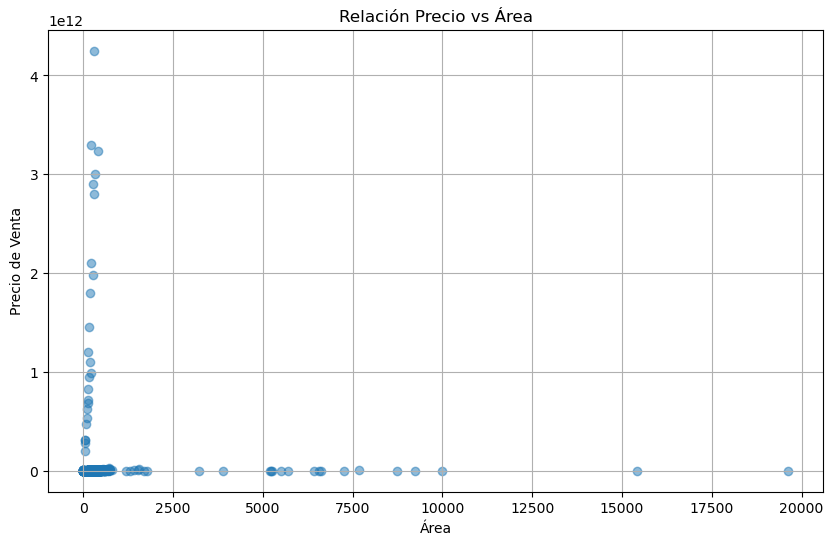

               area  precio_venta
count  4.301300e+04  2.758400e+04
mean   1.800341e+02  2.364794e+09
std    9.163002e+03  5.574198e+10
min    0.000000e+00  1.000000e+06
25%    6.300000e+01  4.029000e+08
50%    1.000000e+02  7.000000e+08
75%    1.740000e+02  1.330000e+09
max    1.900000e+06  4.250000e+12


In [6]:
# Scatter plot Precio vs Area para detectar anomalías
plt.figure(figsize=(10, 6))
plt.scatter(df['area'], df['precio_venta'], alpha=0.5)
plt.title('Relación Precio vs Área')
plt.xlabel('Área')
plt.ylabel('Precio de Venta')
plt.grid(True)
plt.show()

# Ver estadísticas descriptivas de estas dos columnas para ver máximos y mínimos sospechosos
print(df[['area', 'precio_venta']].describe())

In [21]:

print("Cantidad de nulos por columna:")
print(df.isnull().sum())
print("\nPorcentaje de nulos:")
print((df.isnull().sum() / len(df)) * 100)

Cantidad de nulos por columna:
_id                            0
codigo                         0
tipo_propiedad                 0
tipo_operacion                 0
precio_venta               15429
area                           0
habitaciones                   1
banos                          1
administracion              7925
parqueaderos                   1
sector                      1641
estrato                        1
antiguedad                    10
latitud                        0
longitud                       0
direccion                  42219
descripcion                    0
website                        2
last_view                      2
datetime                       2
url                        42219
timeline                   13586
estado                       796
compañia                    4530
precio_arriendo            27184
jacuzzi                        2
piso                       43013
closets                    43013
chimenea                       2
permite_masc

### **Distribución de Variables Numéricas**:

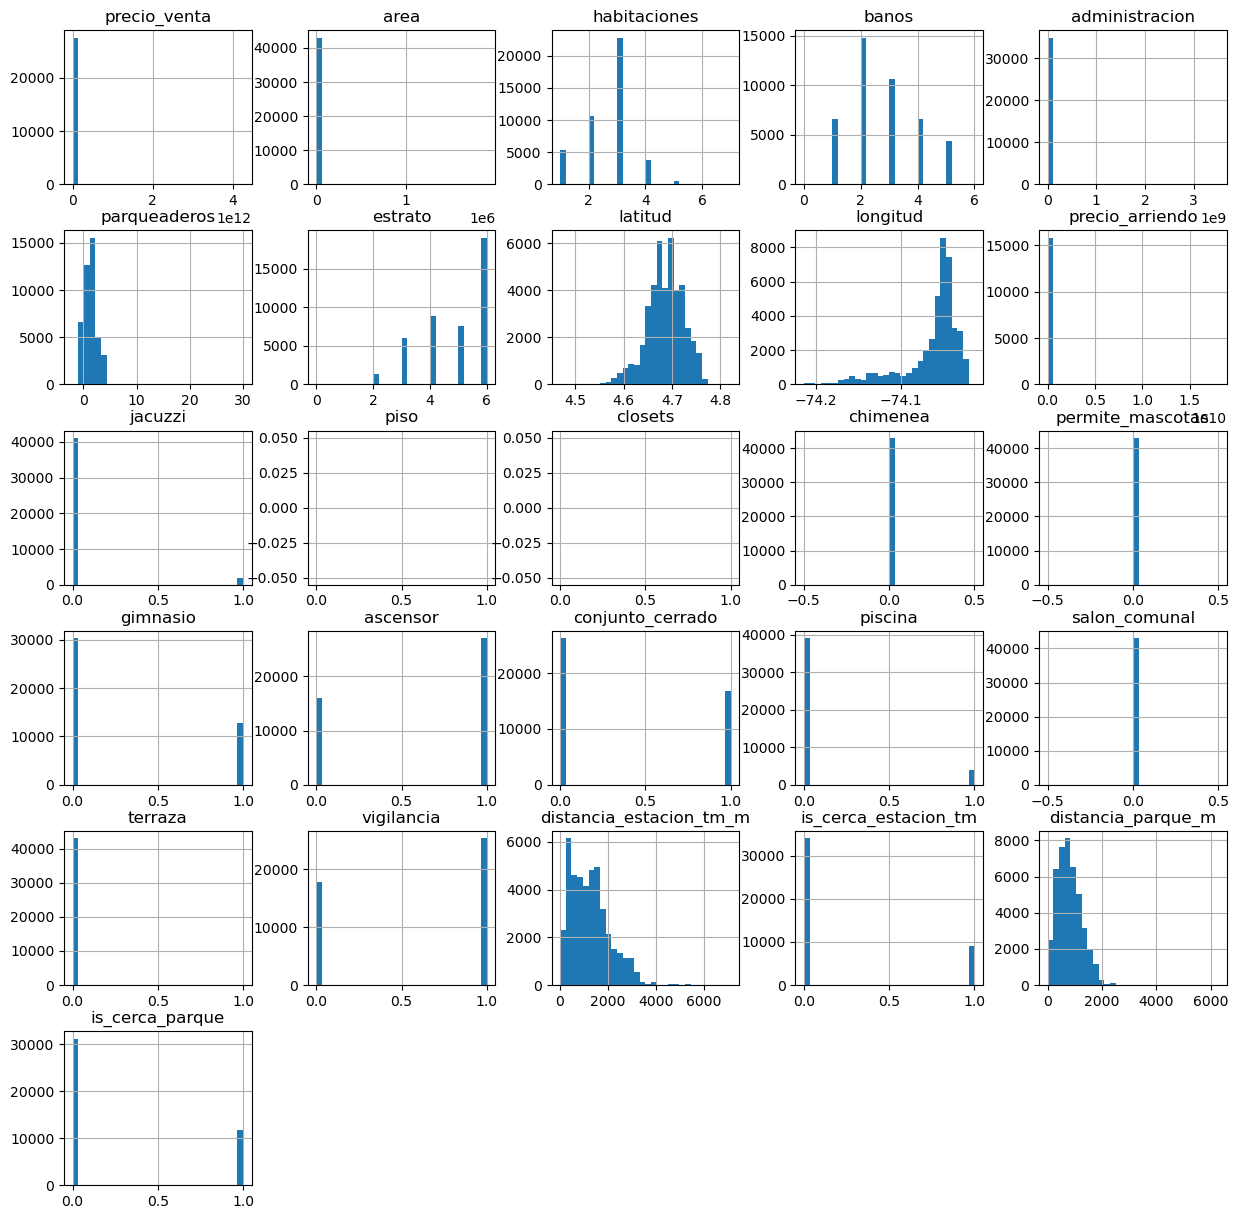

In [22]:

df.hist(figsize=(15, 15), bins=30)
plt.show()

### **Categorías Relevantes**:

In [23]:

cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f"--- {col} ---")
    print(df[col].value_counts().head(10))
    print("\n")

--- _id ---
_id
66d86ebfceda690e85512f64    1
66d86c7eceda690e85508760    1
66d86c7eceda690e85508761    1
66d86c7eceda690e85508762    1
66d86c7eceda690e85508763    1
66d86ebfceda690e85512f54    1
66d86ebfceda690e85512f53    1
66d86ebeceda690e85512f52    1
66d86ebeceda690e85512f51    1
66d86ebeceda690e85512f50    1
Name: count, dtype: int64


--- codigo ---
codigo
MC4721977         1
4133491           1
3889852           1
4386770           1
4210060           1
4387276           1
4166963           1
4448857           1
3822574           1
15654-M5195393    1
Name: count, dtype: int64


--- tipo_propiedad ---
tipo_propiedad
APARTAMENTO                  42943
CASA CON CONJUNTO CERRADO       60
CASA                            10
Name: count, dtype: int64


--- tipo_operacion ---
tipo_operacion
VENTA               27270
ARRIENDO            15515
VENTA Y ARRIENDO      228
Name: count, dtype: int64


--- sector ---
sector
CHICO                                  10674
SANTA BARBARA           

### **Detectar Outliers (Boxplots)**:

In [24]:
# Boxplots para identificar outliers
num_cols = df.select_dtypes(include=['number']).columns
# Ajustar el tamaño de la figura según la cantidad de columnas
df[num_cols].plot(kind='box', subplots=True, layout=(5, 5), figsize=(20, 20), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

ValueError: Layout of 5x5 must be larger than required size 26

<Figure size 2000x2000 with 0 Axes>